In [6]:
import pandas as pd

from matplotlib import pyplot as  plt

import numpy as np

import os

In [7]:
def chatccb_data(mounts,years):
    output_df = pd.DataFrame()
    for mounth in mounts:
        for year in years:
            filepath = 'chatccb_{0}_{1}.xlsx'.format(mounth,year)
            if os.path.isfile(filepath):
                input_df = pd.ExcelFile(filepath).parse('sheet1')
                output_df = pd.concat([output_df,input_df],ignore_index=True)
    return output_df

In [8]:
mounts = ['ene','feb','mar']
years = ['2015','2016','2017']

In [32]:
dataframe = chatccb_data(mounts,years)
dataframe_chatccb = dataframe.copy()
dataframe_chatccb.dropna(subset=['sub_label'], inplace=True)
dataframe_chatccb_size = dataframe_chatccb.groupby('sub_label').size()

In [51]:
dataframe_chatccb_size.drop('otros', inplace=True)
dataframe_chatccb_size_div = dataframe_chatccb_size.div(len(dataframe_chatccb)/100).tolist()

In [52]:
dataframe_chatccb_size_div

[4.046997389033942,
 1.6971279373368147,
 3.6553524804177546,
 1.95822454308094,
 3.133159268929504,
 3.6553524804177546,
 1.1749347258485638,
 4.046997389033942,
 5.87467362924282,
 0.391644908616188,
 1.8276762402088773,
 5.3524804177545695,
 0.6527415143603134,
 0.5221932114882506,
 0.6527415143603134,
 3.524804177545692,
 0.9138381201044387,
 2.6109660574412534,
 0.13054830287206265,
 2.219321148825065,
 5.483028720626632,
 3.6553524804177546,
 2.4804177545691903]

In [45]:
labels = dataframe_chatccb_size.keys().tolist()

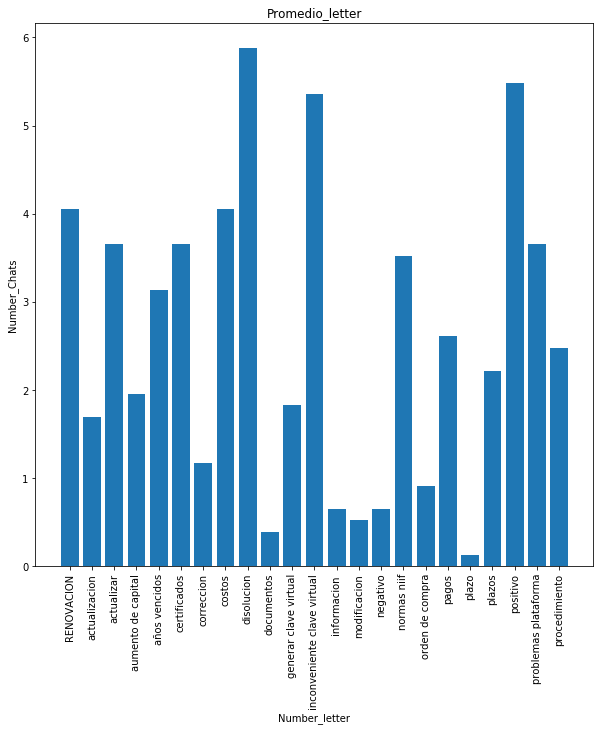

In [53]:
#dataframe
plt.figure(figsize=(10,10))

bins = np.linspace(0, 400, 20)
#plt.hist(dataframe_chatccb_size, bins, normed=False, histtype='stepfilled', color="r",  alpha=1, label="label")
plt.bar(np.arange(len(dataframe_chatccb_size_div)), dataframe_chatccb_size_div)


plt.title("Promedio_letter")
plt.ylabel("Number_Chats")#
plt.xlabel("Number_letter")
plt.xticks(np.arange(len(dataframe_chatccb_size_div)), labels, rotation=90)

#plt.legend()
plt.show()